<a href="https://colab.research.google.com/github/hurricane195/Intro-to-Machine-Learning/blob/Homework-5/HW5_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: please use SGD and ADAM optimizers for each Problem in the homework. Make sure to compare the obtained results between SGD and ADAM.

**Problem 2 (40 pts):**

2.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

For this, you need to use the housing dataset. For training and validation, use 80% (training) and 20% (validation) split. Identify the best parameters for your linear regression model based on the above input variables. In this case, you will have six parameters:

2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per training. Pick the best linear model.

2.c. Compare your results against the linear regression done in homework 1. Do you see meaningful differences?

In [ ]:
#Using modified Temperature example from 'Deep-Learning-with_PyTorch' in Chapter 2 'Pretrained Networks'.
#Using modified Temperature example "Deep Learning with PyTorch: Optimizers How our models learn!" at https://www.greghilston.com/post/3_optimizers/
#Using modified examples for loss from "Mastering PyTorch Loss Functions: The Complete How-To" at https://www.projectpro.io/article/pytorch-loss-functions/880
#Using modified examples for loss from "Noetebook Community: Linear Regression" at https://notebook.community/aidiary/notebooks/pytorch/180130-linear-regression
#Using modified examples for loss from "PyTorch Basics: Tensors & Gradients" at https://www.evanmarie.com/content/files/notebooks/deep_learning_zero_to_gans_pdf.pdf

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import data from .csv file of guithub repository
housing = pd.read_csv('https://raw.githubusercontent.com/hurricane195/Intro-to-Machine-Learning/Datasets/Housing.csv')
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# List of variables to map (string to numerical values)
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# Datacheck
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
#Input variables: area, bedrooms, bathrooms, stories, parking
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
new_df = housing[num_vars]
new_df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [ ]:
new_df.shape

(545, 6)

In [ ]:
#Normalization
scaler = MinMaxScaler()
#scaler = StandardScaler()
new_df[num_vars] = scaler.fit_transform(new_df[num_vars])
new_df.head(10)

,price,area,bedrooms,bathrooms,stories,parking
0,1.000000,0.396564,0.6,0.333333,0.666667,0.666667
1,0.909091,0.502405,0.6,1.000000,1.000000,1.000000
2,0.909091,0.571134,0.4,0.333333,0.333333,0.666667
3,0.906061,0.402062,0.6,0.333333,0.333333,1.000000
4,0.836364,0.396564,0.6,0.000000,0.333333,0.666667
5,0.787879,0.402062,0.4,0.666667,0.000000,0.666667
6,0.727273,0.476289,0.6,0.666667,1.000000,0.666667
7,0.727273,1.000000,0.8,0.666667,0.333333,0.000000
8,0.703030,0.443299,0.6,0.000000,0.333333,0.666667
9,0.696970,0.281787,0.4,0.333333,1.000000,0.333333


In [ ]:
X = new_df.iloc[:, 1:6].values
Y = new_df.iloc[:, 0].values

In [ ]:
#Tensor Conversion
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
#Defining the model
def model(X, W1, W2, W3, W4, W5, B):
    return W5*X[:,4] + W4*X[:,3] + W3*X[:,2] + W2*X[:,1] + W1*X[:,0] + B

In [ ]:
#Mean Squared Error (MSE)
#YP = Predicted Y
def loss_fn(YP, Y):
    squared_diffs = (YP - Y)**2
    return squared_diffs.mean()

In [ ]:
#Defining the weights and biases as arrays of ones and zeros
W1 = torch.ones(())
W2 = torch.ones(())
W3 = torch.ones(())
W4 = torch.ones(())
W5 = torch.ones(())
B = torch.zeros(())

In [ ]:
#Data Split: 80% (training) and 20% (validation)
n_samples = X.shape[0]
n_val = int(0.2 * n_samples)

#shuffling dataset
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [ ]:
train_X = X[train_indices]
train_Y = Y[train_indices]

val_X = X[val_indices]
val_Y = Y[val_indices]

In [ ]:
train_X.size()

torch.Size([436, 5])

In [ ]:
#Define Training loop
def training_loop(n_epochs, optimizer, params, train_X, val_X, train_Y, val_Y):

    for epoch in range(1, n_epochs + 1):
        train_YP = model(train_X, *params)
        train_loss = loss_fn(train_YP, train_Y)

        val_YP = model(val_X, *params)
        val_loss = loss_fn(val_YP, val_Y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 1 or epoch % 500 ==0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return params

In [ ]:
#Initializing parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr=learning_rate)    #Using the SGD optimizer
print('Using SGD Optimizer and Learning Rate = 0.1')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using SGD Optimizer and Learning Rate = 0.1
Epoch 1, Training loss 1.2272, Validation loss 1.2342
Epoch 500, Training loss 0.0122, Validation loss 0.0100
Epoch 1000, Training loss 0.0120, Validation loss 0.0098
Epoch 1500, Training loss 0.0120, Validation loss 0.0097
Epoch 2000, Training loss 0.0120, Validation loss 0.0097
Epoch 2500, Training loss 0.0120, Validation loss 0.0097
Epoch 3000, Training loss 0.0120, Validation loss 0.0097
Epoch 3500, Training loss 0.0120, Validation loss 0.0097
Epoch 4000, Training loss 0.0120, Validation loss 0.0097
Epoch 4500, Training loss 0.0120, Validation loss 0.0097
Epoch 5000, Training loss 0.0120, Validation loss 0.0097


tensor([0.3953, 0.0948, 0.2712, 0.1390, 0.0956, 0.0420], requires_grad=True)

In [ ]:
#Initializing parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr=learning_rate)    #Using the Adam optimizer
print('Using Adam Optimizer and Learning Rate = 0.1')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using Adam Optimizer and Learning Rate = 0.1
Epoch 1, Training loss 1.2272, Validation loss 1.2342
Epoch 500, Training loss 0.0120, Validation loss 0.0097
Epoch 1000, Training loss 0.0120, Validation loss 0.0097
Epoch 1500, Training loss 0.0120, Validation loss 0.0097
Epoch 2000, Training loss 0.0120, Validation loss 0.0097
Epoch 2500, Training loss 0.0120, Validation loss 0.0097
Epoch 3000, Training loss 0.0120, Validation loss 0.0097
Epoch 3500, Training loss 0.0120, Validation loss 0.0097
Epoch 4000, Training loss 0.0120, Validation loss 0.0097
Epoch 4500, Training loss 0.0120, Validation loss 0.0097
Epoch 5000, Training loss 0.0120, Validation loss 0.0097


tensor([0.3953, 0.0948, 0.2712, 0.1390, 0.0956, 0.0420], requires_grad=True)

In [ ]:
#Initializing parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)   #Using the SGD optimizer
print('Using SGD Optimizer and Learning Rate = 0.01')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using SGD Optimizer and Learning Rate = 0.01
Epoch 1, Training loss 1.2272, Validation loss 1.2342
Epoch 500, Training loss 0.0514, Validation loss 0.0436
Epoch 1000, Training loss 0.0233, Validation loss 0.0178
Epoch 1500, Training loss 0.0164, Validation loss 0.0125
Epoch 2000, Training loss 0.0143, Validation loss 0.0112
Epoch 2500, Training loss 0.0134, Validation loss 0.0107
Epoch 3000, Training loss 0.0129, Validation loss 0.0105
Epoch 3500, Training loss 0.0126, Validation loss 0.0103
Epoch 4000, Training loss 0.0124, Validation loss 0.0101
Epoch 4500, Training loss 0.0123, Validation loss 0.0101
Epoch 5000, Training loss 0.0122, Validation loss 0.0100


tensor([0.4356, 0.1924, 0.2696, 0.1130, 0.0791, 0.0043], requires_grad=True)

In [ ]:
#Initializing parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr=learning_rate)   #Using the Adam optimizer
print('Using Adam Optimizer and Learning Rate = 0.01')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using Adam Optimizer and Learning Rate = 0.01
Epoch 1, Training loss 1.2272, Validation loss 1.2342
Epoch 500, Training loss 0.0138, Validation loss 0.0119
Epoch 1000, Training loss 0.0121, Validation loss 0.0101
Epoch 1500, Training loss 0.0120, Validation loss 0.0097
Epoch 2000, Training loss 0.0120, Validation loss 0.0097
Epoch 2500, Training loss 0.0120, Validation loss 0.0097
Epoch 3000, Training loss 0.0120, Validation loss 0.0097
Epoch 3500, Training loss 0.0120, Validation loss 0.0097
Epoch 4000, Training loss 0.0120, Validation loss 0.0097
Epoch 4500, Training loss 0.0120, Validation loss 0.0097
Epoch 5000, Training loss 0.0120, Validation loss 0.0097


tensor([0.3953, 0.0948, 0.2712, 0.1390, 0.0956, 0.0420], requires_grad=True)

In [ ]:
#Initializing parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=learning_rate)    #Using the SGD optimizer
print('Using SGD Optimizer and Learning Rate = 0.001')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using SGD Optimizer and Learning Rate = 0.001
Epoch 1, Training loss 1.2272, Validation loss 1.2342
Epoch 500, Training loss 0.2244, Validation loss 0.2191
Epoch 1000, Training loss 0.1405, Validation loss 0.1327
Epoch 1500, Training loss 0.1193, Validation loss 0.1108
Epoch 2000, Training loss 0.1044, Validation loss 0.0957
Epoch 2500, Training loss 0.0918, Validation loss 0.0832
Epoch 3000, Training loss 0.0810, Validation loss 0.0725
Epoch 3500, Training loss 0.0718, Validation loss 0.0634
Epoch 4000, Training loss 0.0639, Validation loss 0.0557
Epoch 4500, Training loss 0.0571, Validation loss 0.0491
Epoch 5000, Training loss 0.0513, Validation loss 0.0435


tensor([ 0.6933,  0.5590,  0.6547,  0.3641,  0.3592, -0.3923],
       requires_grad=True)

In [ ]:
#Initializing parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=learning_rate)    #Using the Adam optimizer
print('Using Adam Optimizer and Learning Rate = 0.001')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using Adam Optimizer and Learning Rate = 0.001
Epoch 1, Training loss 1.2272, Validation loss 1.2342
Epoch 500, Training loss 0.1281, Validation loss 0.1197
Epoch 1000, Training loss 0.0524, Validation loss 0.0463
Epoch 1500, Training loss 0.0351, Validation loss 0.0299
Epoch 2000, Training loss 0.0238, Validation loss 0.0196
Epoch 2500, Training loss 0.0179, Validation loss 0.0147
Epoch 3000, Training loss 0.0152, Validation loss 0.0128
Epoch 3500, Training loss 0.0139, Validation loss 0.0120
Epoch 4000, Training loss 0.0132, Validation loss 0.0114
Epoch 4500, Training loss 0.0127, Validation loss 0.0109
Epoch 5000, Training loss 0.0123, Validation loss 0.0104


tensor([ 0.4127,  0.2327,  0.2377,  0.1166,  0.0884, -0.0074],
       requires_grad=True)

In [ ]:
#Initializing parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr=learning_rate)    #Using the SGD optimizer
print('Using SGD Optimizer and Learning Rate = 0.0001')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using SGD Optimizer and Learning Rate = 0.0001
Epoch 1, Training loss 1.2272, Validation loss 1.2342
Epoch 500, Training loss 0.9746, Validation loss 0.9792
Epoch 1000, Training loss 0.7814, Validation loss 0.7841
Epoch 1500, Training loss 0.6338, Validation loss 0.6348
Epoch 2000, Training loss 0.5210, Validation loss 0.5206
Epoch 2500, Training loss 0.4346, Validation loss 0.4331
Epoch 3000, Training loss 0.3684, Validation loss 0.3658
Epoch 3500, Training loss 0.3174, Validation loss 0.3140
Epoch 4000, Training loss 0.2782, Validation loss 0.2741
Epoch 4500, Training loss 0.2478, Validation loss 0.2431
Epoch 5000, Training loss 0.2242, Validation loss 0.2189


tensor([ 0.8478,  0.7573,  0.9090,  0.7796,  0.7942, -0.5060],
       requires_grad=True)

In [ ]:
#Initializing parameters (weights and the biases)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr=learning_rate)    #Using the Adam optimizer
print('Using Adam Optimizer and Learning Rate = 0.0001')

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_X = train_X,
    val_X = val_X,
    train_Y = train_Y,
    val_Y = val_Y)

Using Adam Optimizer and Learning Rate = 0.0001
Epoch 1, Training loss 1.2272, Validation loss 1.2342
Epoch 500, Training loss 0.9977, Validation loss 1.0005
Epoch 1000, Training loss 0.8027, Validation loss 0.8022
Epoch 1500, Training loss 0.6384, Validation loss 0.6353
Epoch 2000, Training loss 0.5013, Validation loss 0.4961
Epoch 2500, Training loss 0.3883, Validation loss 0.3817
Epoch 3000, Training loss 0.2969, Validation loss 0.2892
Epoch 3500, Training loss 0.2247, Validation loss 0.2164
Epoch 4000, Training loss 0.1694, Validation loss 0.1610
Epoch 4500, Training loss 0.1289, Validation loss 0.1206
Epoch 5000, Training loss 0.1007, Validation loss 0.0927


tensor([ 0.6141,  0.6145,  0.5903,  0.5966,  0.5935, -0.3702],
       requires_grad=True)

Comparison to Housing set done in Homework 2 P3A:

 Add a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization).

X1 =  [7420 8960 9960 7500 7420]
X2 =  [4 4 3 4 4]
X3 =  [2 4 2 2 1]
X4 =  [3 4 2 2 2]
X5 =  [2 3 2 3 2]
y =  [13300000 12250000 12250000 12215000 11410000]
m =  545
The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 = 0.4000000000000002
The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 = 0.10000000000000002
Final value of theta = [-0.1458334   0.30368456 -0.01681056  0.28188899  0.1560482   0.05685712]
cost_history = [0.39223213 0.38482858 0.37777019 ... 0.20679341 0.20679341 0.20679341]
test_cost_history = [0.09789291 0.09588701 0.09397696 ... 0.05411445 0.05411445 0.05411445]


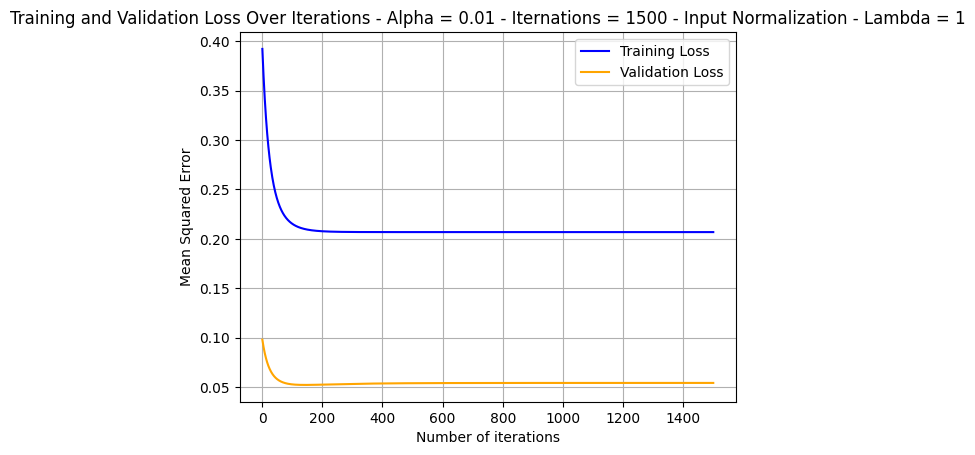

In [ ]:
#using a modified version of Dr. Tabkhi's "LinearRegression" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/IntroCodes/LinearRegression.ipynb
#using a modified version of Dr. Tabkhi's "Pre_Processing" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/Pre_Processing.ipynb
#using a modified version of Dr. Tabkhi's "DummyRegressionValidation" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/DummyRegressionValidation.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/hurricane195/Intro-to-Machine-Learning/Datasets/Housing.csv'
housing = pd.read_csv(url)
housing.head()

# Separate features and labels

#area, bedrooms, bathrooms, stories, parking

X1 = housing.values[:,1]  # get AREA input values from the second column
X2 = housing.values[:,2]  # get BEDROOM input values from the third column
X3 = housing.values[:,3]  # get BATHROOM input values from the fourth column
X4 = housing.values[:,4]  # get STORIES input values from the fith column
X5 = housing.values[:,10]  # get PARKING input values from the eleventh column
y = housing.values[:,0]  # get output values from fourth column -- Y is the list here
m = len(y)  # Number of training examples

# Display first 5 records and the total number of training examples
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('X4 = ', X4[: 5])
print('X5 = ', X5[: 5])
print('y = ', y[: 5])
print('m = ', m)

"""
# Scatter plot
plt.scatter(X1, y, color='red', marker='+')
plt.scatter(X2, y, color='blue', marker='x')
plt.scatter(X3, y, color='purple', marker='*')
plt.scatter(X4, y, color='orange', marker='o')
plt.scatter(X5, y, color='gray', marker='.')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X')

plt.ylabel('Y')
plt.title('Scatter plot of raw data')

# Show the plot
plt.show()
"""

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

#df_test.shape

from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_newTrain=df_train[num_vars]
df_newTrain.head()

#df_newTrain.shape

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_newTest=df_test[num_vars]
df_newTest.head()

#df_newTest.shape

y_newTrain = df_newTrain.pop('price')
y_newTest=df_newTest.pop('price')

#y_newTrain.head()
#y_newTest.head()

X_newTrain = df_newTrain
X_newTest = df_newTest

#X_newTrain.head()

#X_newTest.head()

#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.

X_0_train = np.ones((len(X_newTrain), 1))
X_0_train[:5]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTrain = np.hstack((X_0_train, X_newTrain))
xTrain[:5]

X_0_test = np.ones((len(X_newTest), 1))
X_0_test[:5]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTest = np.hstack((X_0_test, X_newTest))
xTest[:5]

theta = np.zeros(6)
theta

def compute_cost(xTrain, y_newTrain, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTrain.dot(theta)
    errors = np.subtract(predictions, y_newTrain)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

# Lets compute the cost for theta values
cost = compute_cost(xTrain, y_newTrain, theta)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 =', cost)

def compute_cost(xTest, y_newTest, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTest.dot(theta)
    errors = np.subtract(predictions, y_newTest)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)

    return J

# Lets compute the cost for theta values
cost = compute_cost(xTest, y_newTest, theta)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 =', cost)

def gradient_descent(xTrain, y_newTrain, theta, alpha, iterations, lambdaValue):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = xTrain.dot(theta)
        errors = np.subtract(predictions, y_newTrain)
        sum_delta = (alpha / len(X_newTrain)) * xTrain.transpose().dot(errors)
        sum_reg = (lambdaValue/len(X_newTrain))*sum(theta)
        #theta -= sum_delta - sum_reg
        theta = theta - sum_delta - sum_reg
        cost_history[i] = compute_cost(xTrain, y_newTrain, theta)
        test_cost_history[i] = compute_cost(xTest, y_newTest, theta)

    return theta, cost_history, test_cost_history

theta = [0., 0., 0., 0., 0., 0]
iterations = 1500
alpha = 0.01
lambdaValue = 1;


theta, cost_history, test_cost_history = gradient_descent(xTrain, y_newTrain, theta, alpha, iterations, lambdaValue)
print('Final value of theta =', theta)
print('cost_history =', cost_history)
print('test_cost_history =', test_cost_history)

"""
# Scatter plot
#area, bedrooms, bathrooms, stories, parking
plt.scatter(xTrain[:,1], y_newTrain, color='red', marker='+', label='Area')
plt.scatter(xTrain[:,2], y_newTrain, color='blue', marker='x', label='Bedrooms')
plt.scatter(xTrain[:,3], y_newTrain, color='purple', marker='*', label='Bathrooms')
plt.scatter(xTrain[:,4], y_newTrain, color='orange', marker='o', label='Stories')
plt.scatter(xTrain[:,5], y_newTrain, color='gray', marker='.', label='Parking')

# Line plot for the linear regression model
plt.plot(xTrain[:, 1], xTrain.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Variables')
plt.ylabel('Y')
plt.title('Linear Regression Fit - Alpha = 0.01 - Iternations = 1500 - Input Normalization - Lambda = 1')
plt.legend()

# Show the plot
plt.show()
"""

plt.plot(range(1, iterations + 1), cost_history, color='blue', label= 'Training Loss')
plt.plot(range(1, iterations + 1), test_cost_history, color='orange', label= 'Validation Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Iterations - Alpha = 0.01 - Iternations = 1500 - Input Normalization - Lambda = 1')

# Show the plot
plt.show()